In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

##### Data collection and Processing

In [2]:
heart_data = pd.read_csv('D:\Minor Project\heart disease\heart_disease_data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13552\734744080.py:1: SyntaxWarning: invalid escape sequence '\M'
  heart_data = pd.read_csv('D:\Minor Project\heart disease\heart_disease_data.csv')


In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(302, 14)

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.377483,0.685430,0.970199,131.629139,246.069536,0.149007,0.526490,149.672185,0.324503,1.039073,1.400662,0.731788,2.311258,0.546358
std,9.095099,0.465115,1.032257,17.567002,51.805910,0.356686,0.526027,22.938930,0.468966,1.162965,0.616818,1.023438,0.612011,0.498673
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,16))
sns.heatmap(heart_data.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Betweeen Variables", size=20)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
#checking distribution of target variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [ ]:
#checking the variance
heart_data.var()

age           82.720820
sex            0.216332
cp             1.065554
trestbps     308.599547
chol        2683.852291
fbs            0.127225
restecg        0.276705
thalach      526.194506
exang          0.219929
oldpeak        1.352488
slope          0.380465
ca             1.047425
thal           0.374557
target         0.248674
dtype: float64

#### Normalization

In [ ]:
heart_data['trestbps']=np.log(heart_data['trestbps'])
heart_data['chol']=np.log(heart_data['chol'])
heart_data['thalach']=np.log(heart_data['thalach'])
np.var(heart_data[["trestbps",'chol','thalach']])

trestbps    0.016950
chol        0.041355
thalach     0.027138
dtype: float64

##### Splitting features and Target

In [ ]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

##### Splitting into Training and Test data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(302, 13) (241, 13) (61, 13)


##### Model training

#### Logistic Regression

In [ ]:
# Logistic Regression model for binary classification
lg = LogisticRegression()
lg.fit(X_train,Y_train)

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### Evaluate the model

In [ ]:
#Accuracy on training data
lg_train_prediction = lg.predict(X_train)
lg_training_data_accuracy = round(accuracy_score(lg_train_prediction,Y_train)*100,2)
print("Train data accuracy: "+str(lg_training_data_accuracy)+" %")

#Accuracy on test data
lg_test_prediction = lg.predict(X_test)
lg_test_data_accuracy = round(accuracy_score(lg_test_prediction,Y_test)*100,2)
print("Test data accuracy: "+str(lg_test_data_accuracy)+" %")

Train data accuracy: 85.89 %
Test data accuracy: 81.97 %


In [ ]:
print(confusion_matrix(Y_test, lg_test_prediction))
print(classification_report(Y_test, lg_test_prediction))

[[23  5]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=10000)
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=10000)

In [ ]:
#Accuracy on training data
pred_train_rf = rf.predict(X_train)
rf_train_accuracy = round(accuracy_score(pred_train_rf,Y_train)*100,2)
print("The accuracy score achieved using the Random Forest model is: "+str(rf_train_accuracy)+" %")

#Accuracy on test data
rf_test_pred = rf.predict(X_test)
rf_test_accuracy = round(accuracy_score(rf_test_pred,Y_test)*100,2)
print("The accuracy score achieved using the Random Forest model is: "+str(rf_test_accuracy)+" %")

The accuracy score achieved using the Random Forest model is: 100.0 %
The accuracy score achieved using the Random Forest model is: 81.97 %


C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


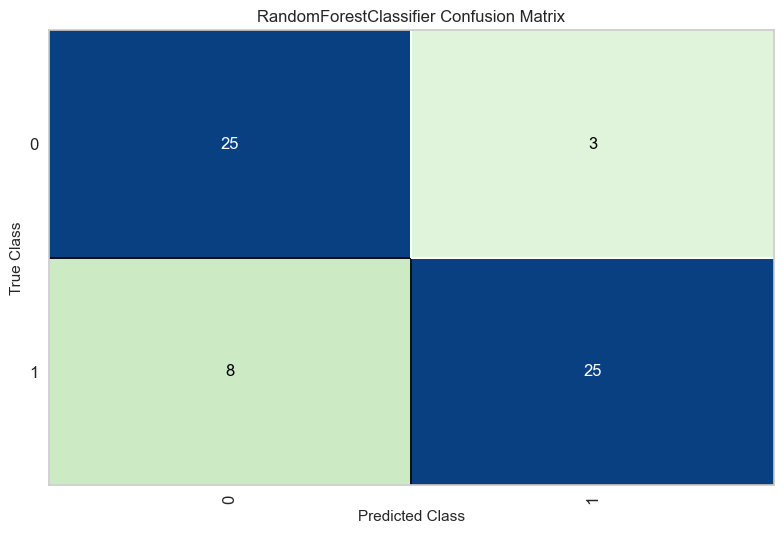

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
rf_cm = ConfusionMatrix(rf, cmap='GnBu')
rf_cm.fit(X_train, Y_train)
rf_cm.score(X_test, Y_test)
rf_cm.show()

In [ ]:
print(classification_report(Y_test,rf_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        28
           1       0.89      0.76      0.82        33

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)

#Accuracy on training data
knn_train_prediction = knn.predict(X_train)
knn_training_data_accuracy = round(accuracy_score(knn_train_prediction,Y_train)*100,2)
print("The accuracy score achieved using the KNN model is: "+str(knn_training_data_accuracy)+" %")

#Accuracy on test data
knn_test_prediction = knn.predict(X_test)
knn_test_data_accuracy = round(accuracy_score(knn_test_prediction,Y_test)*100,2)
print("The accuracy score achieved using the KNN model is: "+str(knn_test_data_accuracy)+" %")

The accuracy score achieved using the KNN model is: 83.82 %
The accuracy score achieved using the KNN model is: 75.41 %


In [ ]:
print(confusion_matrix(Y_test, knn_test_prediction))
print(classification_report(Y_test, knn_test_prediction))

[[17 11]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.81      0.61      0.69        28
           1       0.72      0.88      0.79        33

    accuracy                           0.75        61
   macro avg       0.77      0.74      0.74        61
weighted avg       0.76      0.75      0.75        61



#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)

#Accuracy on training data
nbm_train_prediction = nb.predict(X_train)
nbm_training_data_accuracy = round(accuracy_score(nbm_train_prediction,Y_train)*100,2)
print("The accuracy score achieved using the Naive Bayes model is: "+str(nbm_training_data_accuracy)+" %")

#Accuracy on test data
nbm_test_prediction = nb.predict(X_test)
nbm_test_data_accuracy = round(accuracy_score(nbm_test_prediction,Y_test)*100,2)
print("The accuracy score achieved using the Naive Bayes model is: "+str(nbm_test_data_accuracy)+" %")

The accuracy score achieved using the Naive Bayes model is: 83.82 %
The accuracy score achieved using the Naive Bayes model is: 75.41 %


#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC(probability=True,C=1,gamma=0.1)
svm.fit(X_train,Y_train)

#Accuracy on training data
svc_train_prediction = svm.predict(X_train)
svc_training_data_accuracy = round(accuracy_score(svc_train_prediction,Y_train)*100,2)
print("The accuracy score achieved using the SVM model is: "+str(svc_training_data_accuracy)+" %")

#Accuracy on test data
svc_test_prediction = svm.predict(X_test)
svc_test_data_accuracy = round(accuracy_score(svc_test_prediction,Y_test)*100,2)
print("The accuracy score achieved using the SVM model is: "+str(svc_test_data_accuracy)+" %")

The accuracy score achieved using the SVM model is: 92.95 %
The accuracy score achieved using the SVM model is: 73.77 %


##### Comparison Of Models Accuracy

In [ ]:
scores = [lg_test_data_accuracy,nbm_test_data_accuracy,svc_test_data_accuracy,knn_test_data_accuracy,rf_test_accuracy]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Random Forest"]    
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 81.97 %
The accuracy score achieved using Naive Bayes is: 75.41 %
The accuracy score achieved using Support Vector Machine is: 73.77 %
The accuracy score achieved using K-Nearest Neighbors is: 75.41 %
The accuracy score achieved using Random Forest is: 81.97 %


Text(0, 0.5, 'Accuracy score')

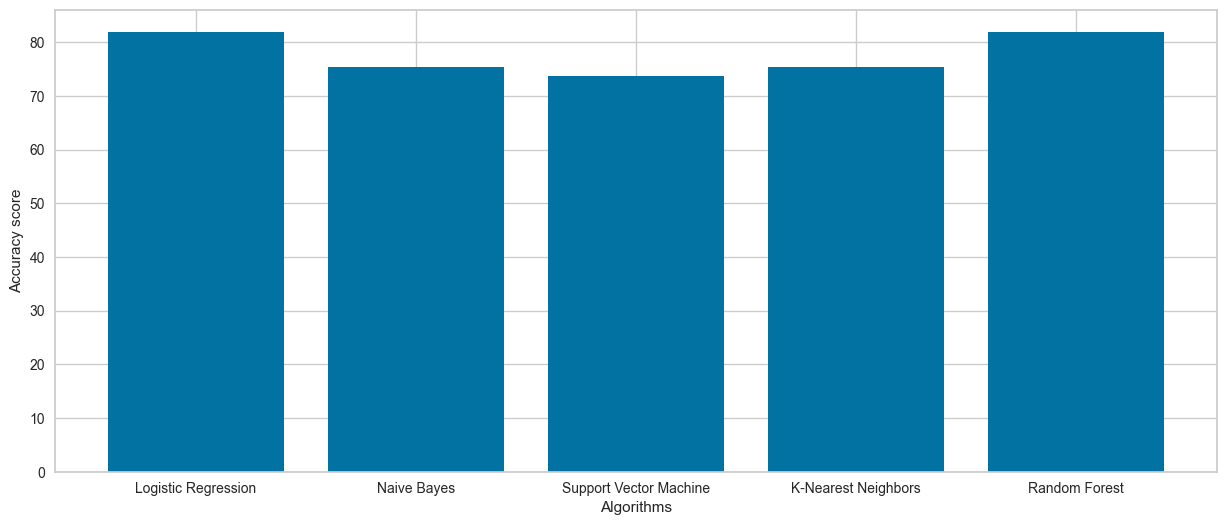

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (15,6))
plt.bar(algorithms,scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


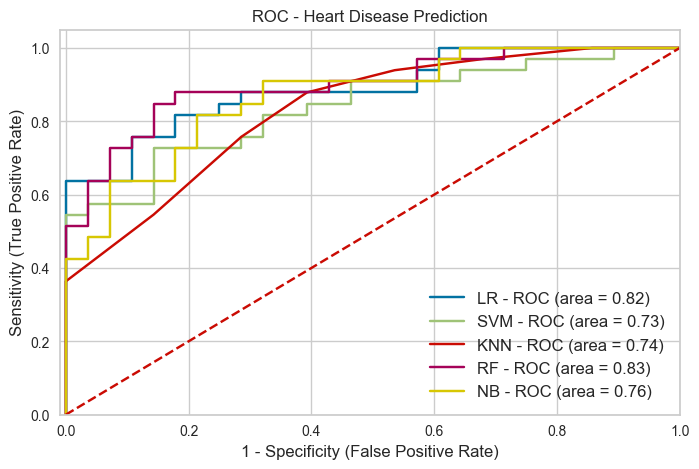

In [ ]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lg,
},

{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'RF',
    'model': rf,
},
{
   'label': 'NB',
   'model': nb,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, Y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Heart Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
#plt.savefig("outputs/roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

##### Predictive System Model

In [ ]:
input_data = (60,0,0,150,258,0,0,157,0,2.6,1,2,3)
#change input data to numpy array
input_array = np.array(input_data).reshape((1, -1))
prediction = lg.predict(input_array)
print("Predicted value: ", prediction)

if prediction[0]==0:
    print("Person doesn't have heart disease")
else:
    print("Person has heart disease")

Predicted value:  [0]
Person doesn't have heart disease


C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
file_name = 'heart_disease_model.sav'
pickle.dump(lg,open(file_name,'wb'))